## Машинное обучение: задание 2

### 1 Теоретические задачи

### 1.1 Ответы в листьях регрессионного дерева

Какая стратегия поведения в листьях регрессионного дерева приводит к меньшему матожиданию ошибки по MSE: отвечать средним значением таргета на объектах обучающей выборки, попавших в лист, или отвечать таргетом для случайного объекта из листа (считая все объекты равновероятными)?

#### Ответ:
Пусть $y^*$ - ответ, который мы даем в листе регрессионного дерева. Попробуем минимизировать матожидание ошибки по MSE:

$E(\frac{1}{n}\sum\limits_{i=1}^n (y_i - y^*)^2) = \frac{1}{n}\sum\limits_{i=1}^n E(y_i - y^*)^2$, раскрыли по линейности, а теперь возьмём производную от этого выражения и приравняем к нулю

Для отдельного слагаемого $E(y-y^*)^2 = E y^2 - 2y^* Ey + E (y^*)^2$

$(E y^2 - 2y^* Ey + E (y^*)^2)' = 2Ey - 2y^*$

Для суммы: $ \sum\limits_{i=1}^n (Ey_i - y^*) = 0$

$y^* = \frac{1}{n} \sum\limits_{i=1}^n Ey_i $ - среднее значение таргета минимизирует матожидание ошибки по MSE

### 1.2 Линейные модели в деревьях
Одна из частых идей - попытаться улучшить регрессионное дерево, выдавая вместо константных ответов в листьях ответ линейной регрессии, обученной на объектах из этого листа.Как правило такая стратегия не дает никакого ощутимого выигрыша. Попробуйте объяснить, почему? Как стоит модифицировать построение разбиений в дереве по MSE, чтобы при разбиении получались множества, на которых линейные модели должны работать неплохо?

#### Ответ
Регрессионное дерево - это кусочно постоянная функция, которое каждому объекту, который дошел до листа, сопоставляет константный ответ таким образом, чтобы минимизаровать ошибку на этом объекте. Значит, все объекты, находящиеся в одном листе, имеют значения targeta близкое к какому-то константному и линейная регрессия на таких объектах не даст особого выигрыша.

Если в разбиениях в дереве брать множетсва с большими разбросами значений, то линейные модели на них будут работать неплохо

### 1.3 Unsupervised decision tree
Unsupervised решающие деревья можно было бы применить для кластеризации выборки или
оценки плотности, но проблема построения таких деревьев зак,лючается в введении меры
информативности. В одной статье предлагался следующий подход - оценивать энтропию
множества $S$ по формуле:

$ H(S) = \frac{1}{2}ln ((2\pi e)^n|\Sigma|) $

Здесь $\Sigma$ - оцененная по множеству матрица ковариаций. Т.е. не имея других сведений, в
предложенном подходе мы по умолчанию считаем, что скопления точек можно приближенно
считать распределенными нормально. Убедитесь, что это выражение в самом деле задает
энтропию многомерного нормального распределения.

#### Ответ

Если посчитать энтропию многомерного нормального распределения

$f(x) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}} \cdot e^{-\frac{1}{2}(x - \mu)^T\cdot \Sigma^{-1} \cdot (x - \mu)}$ - плотность

$H(x) = -\int\limits_{- \infty}^{+ \infty} f(x) ln(f(x)) dx$, то действительно получится данное выражение

$ H(S) = \frac{1}{2}ln ((2\pi e)^n|\Sigma|) $

### 2 Применение решающего дерева

20% баллов за задание, оценочное время выполнения 30 минут + установка GraphViz

Постройте решающее дерево из sklearn на датасете german credit data из UCI репозитория
и визуализируйте его. Попробуйте проинтерпретировать первые несколько разбиений, изу-
чив описание признаков. Постройте графики зависимости качества на кросс-валидации и на
обучающей выборке от глубины дерева

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from IPython.display import Image
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import numpy as np
import pydotplus 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

%pylab inline

C:\Program Files\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


### Подготавливаем данные

In [302]:
# данные взяты отсюда https://onlinecourses.science.psu.edu/stat857/node/215
data = pd.read_csv('data/german_credit_data/german_credit.csv')

In [303]:
credit_data = pd.DataFrame(data)
credit_data_features = credit_data.columns[1:]
X_data = credit_data.iloc[:, 1:]
y_data = credit_data.Creditability

#### Строим дерево

In [304]:
model = tree.DecisionTreeClassifier()
model.fit(X_data, y_data)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [305]:
dot_data = tree.export_graphviz(model, out_file="credit_tree.out", 
                         feature_names=credit_data_features,  
                         class_names=['credit approved', 'credit rejected'],  
                         filled=True, rounded=True,  
                         special_characters=True)

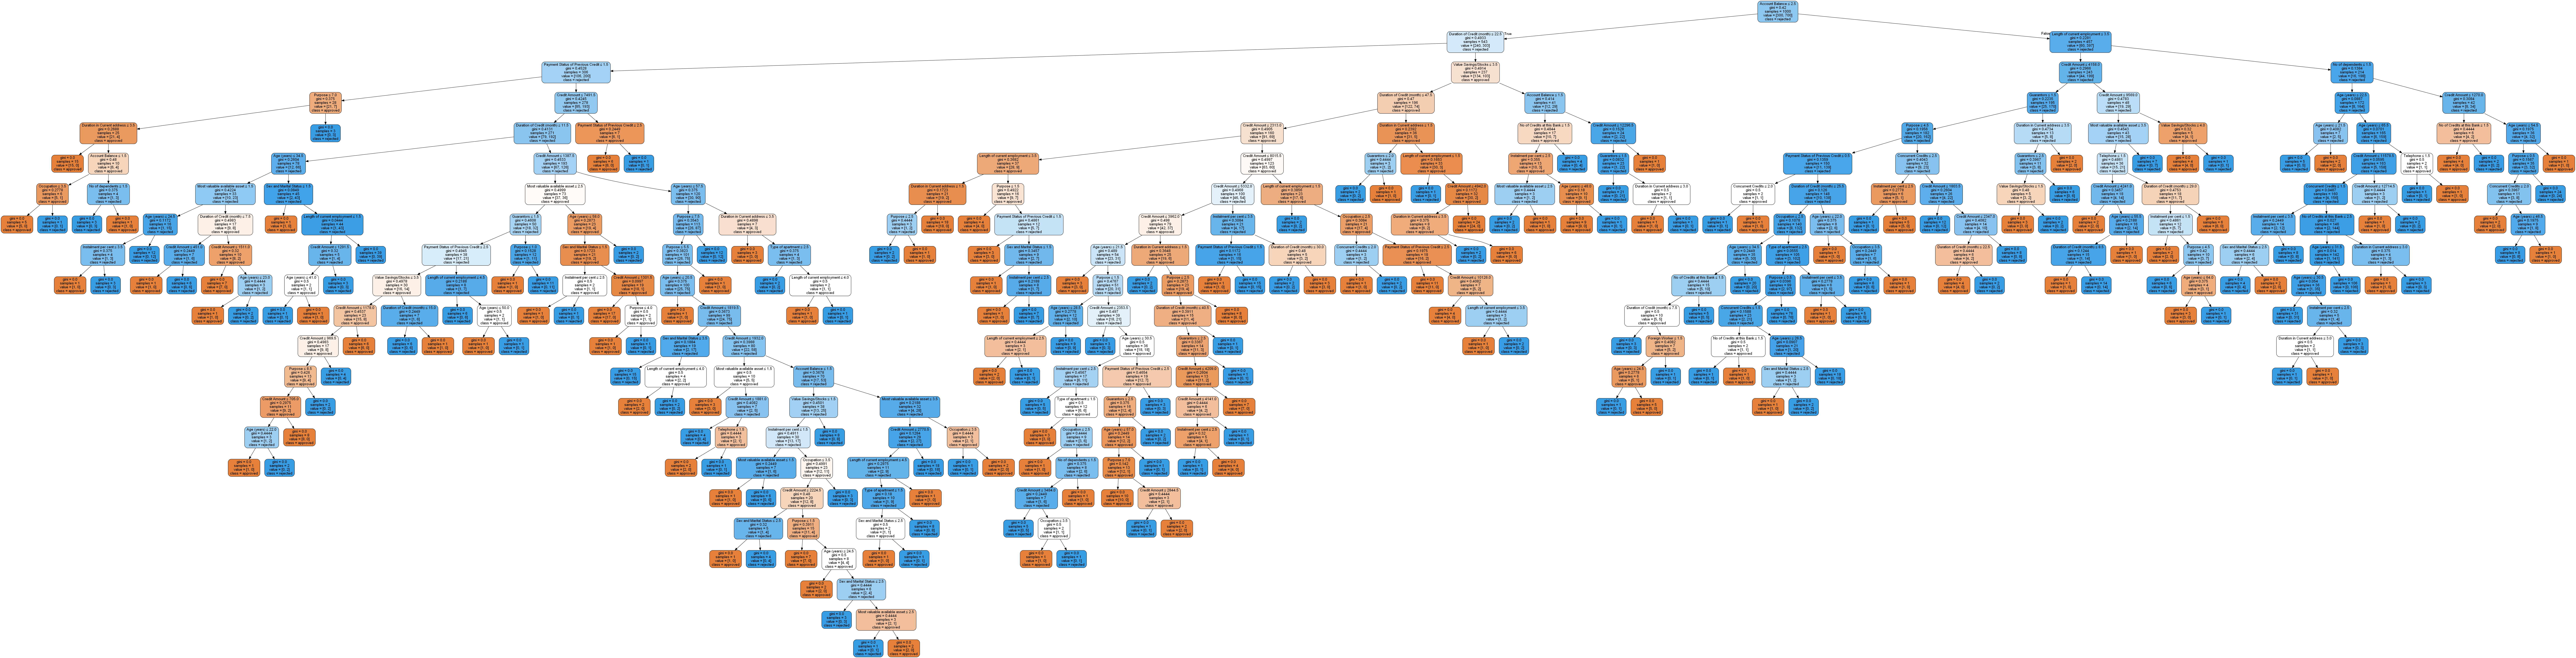

In [306]:
graph = pydotplus.graphviz.graph_from_dot_file("credit_tree.out")  
Image(graph.create_png())

#### Попробуем уменьшить глубину дерева

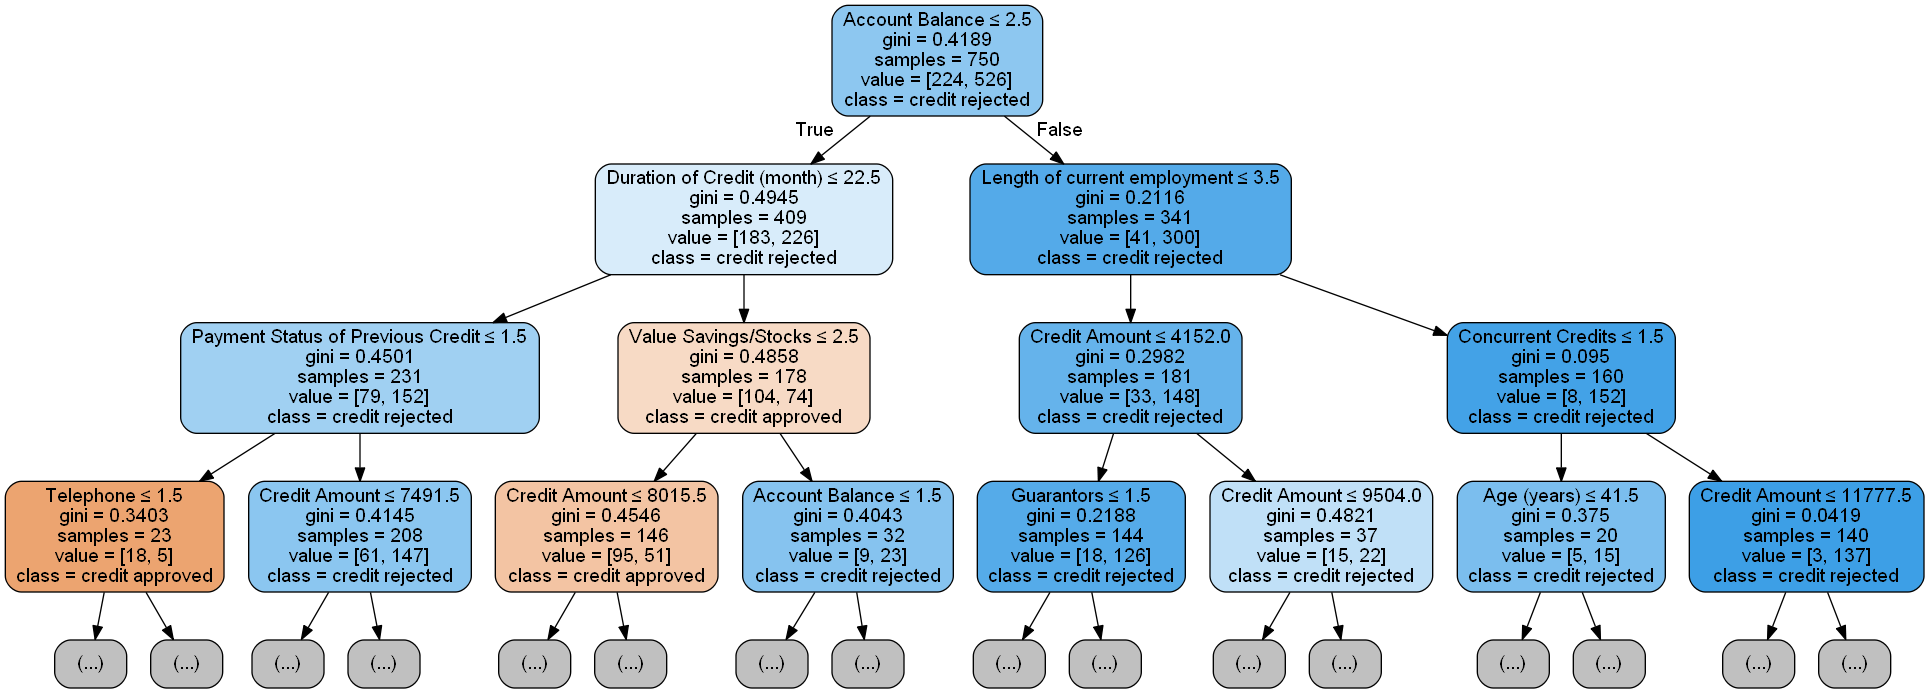

In [322]:
dot_data1 = tree.export_graphviz(model, out_file="credit_tree1.out", 
                         max_depth = 3,
                         feature_names=credit_data_features,  
                         class_names=['credit approved', 'credit rejected'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph1 = pydotplus.graphviz.graph_from_dot_file("credit_tree1.out")  
Image(graph1.create_png())

#### Вывод: 
Разбиение очень легко интерпертируется: как и в реальной жизни, мы сначала смотрим на баланс счета клиента, потом на срок и сумму кредита и т.д

#### Проверим качество алгоритма, построим графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева

In [319]:
train_data, test_data, train_target, test_target = train_test_split(credit_data.iloc[:, 1:], credit_data.Creditability,
                                                                   test_size = 0.25)
depth = np.arange(4, 50)

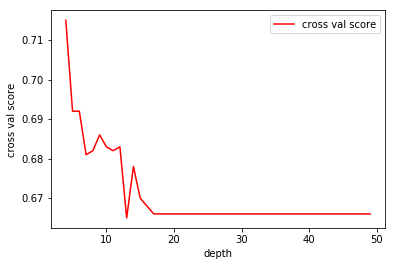

In [326]:
cross_val_scores = []
for d in depth:
    cross_val_scores.append((cross_val_score(tree.DecisionTreeClassifier(random_state=0, max_depth = d), X_data, y_data)).mean())

plt.plot(depth, cross_val_scores, color='red', label='cross val score')
plt.ylabel('cross val score')
plt.xlabel('depth')
plt.legend()
plt.show()

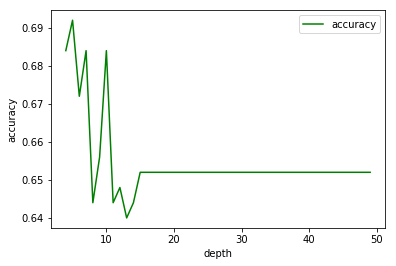

In [327]:
accuracy_scores = []
for d in depth:
    model = tree.DecisionTreeClassifier(random_state=0, max_depth = d)
    model.fit(train_data, train_target)
    accuracy_scores.append(accuracy_score(model.predict(test_data),test_target))

plt.plot(depth, accuracy_scores, color='green', label='accuracy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend()
plt.show()

### Вывод

Видно, что чем больше у дерева глубина, тем оно больше подстраивается под выборку

### 3 Реализация решающего дерева (опциональная часть)

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston_data = pd.DataFrame(boston.data)
boston_data.columns = boston.feature_names
boston_data['target'] = boston.target

In [6]:
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Создаем решающее дерево стандартным жадным алгоритмом

In [7]:
class Node:
    def __init__(self, d=0, feat='', thr=0, l=None, r=None):
        """
        Поля   
        
        feature: string - по какому признаку разделение в этой вершине
        
        threshold: int - порог по этому признаку
            
        data: int - если это лист, то какой ответ должен быть у объектов в листе
            
        left, right: Node - левый и правый потомки            
        """
        self.data = d
        self.feature = feat
        self.threshold = thr
        self.left = l
        self.right = r

In [8]:
class DecisionTree:
    def __init__(self, features, max_depth=0):
        """
        Поля
        
        root: Node - корень дерева
        
        max_depth: int - максимальная глубина дерева
            
        features: np.array - признаки 
        """
        
        self.max_depth = max_depth
        self.features = features
    
    def __builder(self, X_train, y_train, cur_depth):
        answers = np.array(y_train)
        size = len(y_train)
        
        # если в X_train мало элементов или превышена максимальная глубина, то объединяем все элементы в лист
        # и в ответе даем среднее значение
        if (size <= 6 or (self.max_depth != 0 and cur_depth >= self.max_depth)):
            new_leaf = Node(answers.mean())
            new_leaf.num = size
            return new_leaf;
        
        X_copy = X_train.copy()
        X_copy.insert(0, 'target', y_train)
                
        # находим наиболее информативное разбиение, пользуясь критерием MSE
        min_inf = 1000000000000000
        best_feat = ''
        best_thr = 0
        for feature in self.features:
            
            # переберем все значения признака
            values = np.array(X_train[feature])
            thresholds = np.unique(values)

            for threshold in thresholds: 
            
                y_left = X_copy[X_copy[feature] <= threshold].target
                y_right = X_copy[X_copy[feature] > threshold].target
            
                if (len(y_left) != 0 and len(y_right) != 0):

                        H_left = sum((y_left - y_left.mean())**2)/len(y_left)
                        H_right = sum((y_right - y_right.mean())**2)/len(y_right)

                        inf = len(y_left)*H_left/size + len(y_right)*H_right/size

                        if (inf <= min_inf):
                            min_inf = inf
                            best_feat = feature
                            best_thr = threshold
       
        # разбиваем выборку на две части с помощью найденного разбиения
        X_train_0 = X_copy[X_copy[best_feat] <= best_thr]
        X_train_1 = X_copy[X_copy[best_feat] > best_thr]
        
        # если мы так неудачно разбили, что в одном множестве совсем не оказалось элементов или их оказалось мало,
        # то создаем новый лист
        if (len(X_train_0) <= 5 or len(X_train_1) <= 5):
            if len(X_train_0) <= 5:
                new_leaf = Node(X_train_1.target.mean())
                return new_leaf;
            else:
                new_leaf = Node(X_train_0.target.mean())
                return new_leaf;
 
        # иначе создаем новую вершину  и продолжаем построение дерева
        new_vertex = Node(0, best_feat, best_thr)
        new_vertex.left = self.__builder(X_train_0.iloc[:, 1:], X_train_0.target, cur_depth+1)
        new_vertex.right = self.__builder(X_train_1.iloc[:, 1:], X_train_1.target, cur_depth+1)
        
        return new_vertex;
    
    def __find(self, x, cur_vertex):

        if (cur_vertex.feature != ''):
            if x[cur_vertex.feature] <= cur_vertex.threshold:
                return self.__find(x, cur_vertex.left);
            else:
                return self.__find(x, cur_vertex.right);
        else:
            return cur_vertex.data
        
    def fit(self, X_train, y_train):
        
        self.root = self.__builder( X_train, y_train, 0)
        
        
    def predict(self, X_test):
        
        size = len(X_test)
        y_pred = np.zeros(size)
        
        for i in range(0, size-1):
            y_pred[i] = self.__find(X_test.iloc[i], self.root)
       
        return y_pred

### Оценим качество, ограничив искусственно глубину дерева

In [17]:
train_data, test_data, train_target, test_target = train_test_split(boston_data.iloc[:, :-1], boston_data.target,
                                                                   test_size = 0.25)

clf = DecisionTree(boston.feature_names, 5)
clf.fit(train_data, train_target)

## Посчитам разброс

In [20]:
predict = clf.predict(test_data)
print "max depth=5 ", sum((predict - test_target)**2)/len(predict)

max depth=5  22.6857002729


In [23]:
train_data, test_data, train_target, test_target = train_test_split(boston_data.iloc[:, :-1], boston_data.target,
                                                                   test_size = 0.25)
# max depth  = 3
clf = DecisionTree(boston.feature_names, 3)
clf.fit(train_data, train_target)
predict = clf.predict(test_data)
print "max depth=3 ", sum((predict - test_target)**2)/len(predict)

max depth=3  23.8895425486


### А теперь не будем ограничивать глубину

In [22]:
train_data, test_data, train_target, test_target = train_test_split(boston_data.iloc[:, :-1], boston_data.target,
                                                                   test_size = 0.25)
clf1 = DecisionTree(boston.feature_names)
clf1.fit(train_data, train_target)
predict1 = clf1.predict(test_data)

print sum((predict1 - test_target)**2)/len(predict1)

26.7927921786


Разброс получился больше, дерево подстроилось под данные